<div class="alert block alert-info alert">

# <center> Scientific Programming in Python

## <center>Karl N. Kirschner<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

# <center> Neural Network using NumPy

## <center> A Perceptron
**Original concept**: Justin Johnson at https://sebarnold.net/tutorials/beginner/pytorch_with_examples.html


<hr style="border:2px solid gray"></hr>

<center><img src="00_images/31_machine_learning/nn_perceptron_example.png" alt="nn_percepton" style="width: 800px;"/></center>

#### Architecture
- "Fully connected" network
- 1 `X1` input layer
- 1 hidden layer (actually 2 layers: `X1` and `Y1`)
    - transformer function
    - activation function
- 1 `Y2` output layer


## Gradient Decent/Optimization

Optimization Problem:
- follow the negative of the gradient (i.e., first derivative)
    - thus, <font color='dodgerblue'>move in the direction of the steepest descent</font>

Partial derivative with respect to the x variable:
\begin{equation}
    \nabla_x = \frac{\partial}{\partial x}
\end{equation}

The gradient decent equation is then defined as:

\begin{equation}
    x_{n+1} = x_n - \alpha \nabla_x{y(x)}
\end{equation}
where <font color='dodgerblue'>$x_n$</font> is **current x value** (e.g., initial) and <font color='dodgerblue'>$\alpha$</font> is the **step size** (i.e., **learning rate**), and <font color='dodgerblue'>$x_{n+1}$</font> is the **new x value**.

#### Example: Gradient descent for a simple one-dimensional function
$$y(x) = x^{2}$$
$$\frac{\partial \ y(x)}{\partial x} = 2x$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def function_x_sqrd(x: float) -> (float, float):
    ''' y(x) = x^2

        Args
            x: input value

        Returns
            y_value: output_Y2 value evaluated at x
            gradient: derivative value evaluated at x
    '''
    y_value = x**2
    gradient = 2*x

    return y_value, gradient


def gradient_descent(function: callable, x_n: float, step_size: float) -> (float, float):
    ''' Gradient descent algorithm.

        x_n+1 = x_n - step_size * gradient

        Args
            function: a 1-dimensional mathematical function
            x_n: input value
            step_size: how big of a move to take (i.e., learning rate)

        Return
            x_n1: new x value
            gradient: gradient value determined at the x_n input
    '''
    _, gradient = function(x_n)
    x_n1 = x_n - step_size * gradient

    return x_n1, gradient

- Initialize objects:
    - the **initial guess** (and the initial gradient - needed for the `while` loop below)
    - the stepsize/**learning rate**
    - a **convergence criteria** for stopping the optimization
    - a dictionary to collect results

In [3]:
x_guess = 2.0
learning_rate = 0.1
convergence_criteria = 0.01

y_value, gradient = function_x_sqrd(x=x_guess) ## the initial gradient

iteration_dict = {0: [x_guess, y_value, gradient]}

- Perform gradient optimization until the convergence criteria is acheived.

In [4]:
iteration = 0

while gradient > convergence_criteria:
    iteration += 1

    new_x, gradient = gradient_descent(function=function_x_sqrd, x_n=x_guess, step_size=learning_rate)
    
    new_y, new_grad = function_x_sqrd(new_x)

    iteration_dict[iteration] = [new_x, new_y, new_grad]

    x_guess = new_x # updated guess

iteration_pd = pd.DataFrame.from_dict(iteration_dict, orient='index', columns=['x', 'y(x)', 'gradient'])
iteration_pd

,x,y(x),gradient
0,2.000000,4.000000,4.000000
1,1.600000,2.560000,3.200000
2,1.280000,1.638400,2.560000
3,1.024000,1.048576,2.048000
4,0.819200,0.671089,1.638400
5,0.655360,0.429497,1.310720
6,0.524288,0.274878,1.048576
7,0.419430,0.175922,0.838861
8,0.335544,0.112590,0.671089
9,0.268435,0.072058,0.536871


- Visualize the data.

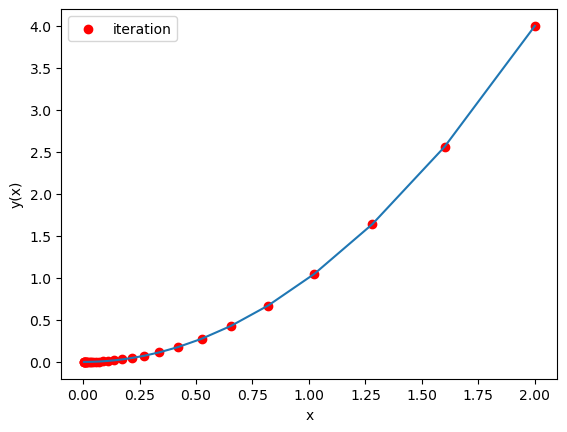

In [5]:
plt.plot(iteration_pd['x'], iteration_pd['y(x)'])
plt.scatter(iteration_pd['x'], iteration_pd['y(x)'], color='red', label='iteration')

plt.xlabel(xlabel='x')
plt.ylabel(ylabel='y(x)')
plt.legend(loc='best')

<hr style="border:2px solid gray"></hr>

## Fully-Connected Perceptron

#### <font color='dodgerblue'>Activation Function</font>

**Purpose**
- introduce **non-linearity** into the system

Without activation functions the **nodes are (typically) connected linearly** (i.e., <font color='dodgerblue'>$w\cdot x + b$</font>). If all nodes are computed using linear functions, then the end **prediction** will be **linearly connected to the input**.

**Source**:
- https://towardsdatascience.com/the-importance-and-reasoning-behind-activation-functions-4dc00e74db41

<br>

Define our activation function, which will be a rectified linear unit (ReLU)
- https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

\begin{equation}
    ReLU(x) = max(0, x) = \frac{x + |x|}{2} =
    \begin{cases}
        x,& \text{if } x>1\\
        0,              & \text{otherwise}
    \end{cases}
\end{equation}

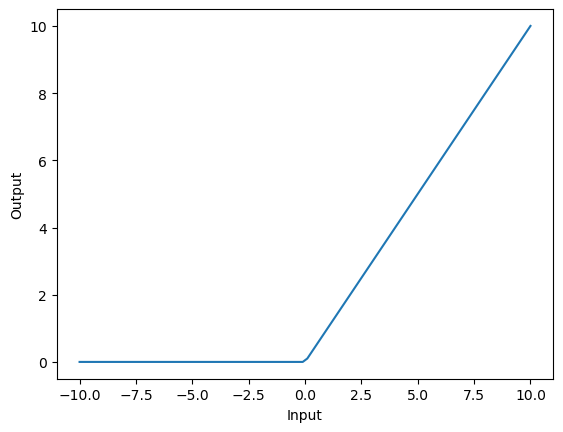

In [6]:
def plot_relu():
    '''Plot the ReLU activation function.'''
    x = np.linspace(-10, 10, 100)
    relu = np.maximum(0, x)

    plt.plot(x, relu)
    plt.xlabel('Input')
    plt.ylabel('Output')

plot_relu()

In [7]:
def relu(x: np.array) -> np.array:
    ''' A rectified linear unit function.'''
    return np.maximum(0, x)

#### <font color='dodgerblue'>Loss Function</font>
Define the loss function. This is needed for a) evaluating the predictions and b) to take its **gradient** so that we can **optimize** the **weights** (and **biases**).

A common loss function is the **mean squared error**, which is also known as **L2 loss**.

\begin{equation}
    MSE = \frac{1}{n} \sum_{i=1}^n (y_{\text{prediction}_i} - y_{\text{target}_i})^2
\end{equation}

<!-- $$\frac{1}{n} \sum_{i=1}^n} (ypred - ytarg)^2$$

\begin{equation}
    \frac{1}{n} \sum_{i=1}^n} (ypred - ytarg)^2
\end{equation} -->

In [8]:
def mse_loss(predicted: np.array, target: np.array) -> np.array:
    ''' Mean Squared error loss function.
    
        Provides a single metric for the loss values.
    '''
    
    return np.mean(np.square(predicted - target))

Consequently, the **gradient** of the **loss function** would be

\begin{equation}
    \nabla_y = \frac{\partial}{\partial y} = 2*(y_{\text{prediction}_i} - y_{\text{target}_i})
\end{equation}

In [9]:
def mse_loss_gradient(predicted: np.array, target: np.array) -> np.array:
    ''' Gradient of the mean squared error loss function.
            i.e., 2.0 * (output_Y2 - target_Y2)
    '''
    gradient = np.multiply(2.0, np.subtract(predicted, target))

    return gradient

#### <font color='dodgerblue'>Toy Data</font>
A random **seed** will be **explicitly set**, allowing for **reproducible results** (i.e., for teaching purposes). The first epoch data generated below should correspond to the numeric values given in the figure above.

The object naming will also be done to parallel the figure above. `rng` (random number generator) follows the example given by NumPy.

<font color='dodgerblue'>Random Number Generator in NumPy</font>:
- `np.random.default_rng`: https://numpy.org/doc/stable/reference/random/generator.html
- via a normal (Gaussian) distribution using `numpy.random.Generator.normal`: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

<br><br>

Define some toy data:
- **input x** values
- **target y** values (for computing the loss function)
- two **initial weight** matrices

For this example, we will not include biases (K.I.S.S. for focused learning).

**Important Note**: Normally with <font color='dodgerblue'>real-world data</font>, one often should <font color='dodgerblue'>normalize</font> (e.g., **transpose** the date to a range [0, 1]) the <font color='dodgerblue'>input data</font>. This helps the mathematics when different input features have **large magnitude differences** (e.g., 1.5 and 2.5e6).
- https://en.wikipedia.org/wiki/Normalization_(statistics)
- `sklearn.preprocessing.normalize`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

The generated data has the same magnitude (i.e., no normalization is done).

In [10]:
rng = np.random.default_rng(seed=12345)

input_X1 = rng.normal(size=(2, 10))
target_Y2 = rng.normal(size=(2, 1))

weight_W1 = rng.normal(size=(10, 3))
weight_W2 = rng.normal(size=(3, 1))

Let's look at the resulting arrays:
- shape
- values

In [11]:
def print_array_specs(in_arrays: dict):
    ''' Helper function for nicely printing NumPy arrays.
        
        Print: shape, data type and the values themselves.
    '''
    for key, value in in_arrays.items():
        print(f'{key}:\n{value.shape}, {value.dtype}')
        print(f'{value}\n')

In [12]:
objects_ini = {'input_X1': input_X1, 'target_Y2': target_Y2,
               'weight_W1': weight_W1, 'weight_W2': weight_W2}

print_array_specs(in_arrays=objects_ini)

input_X1:
(2, 10), float64
[[-1.42382504  1.26372846 -0.87066174 -0.25917323 -0.07534331 -0.74088465
  -1.3677927   0.6488928   0.36105811 -1.95286306]
 [ 2.34740965  0.96849691 -0.75938718  0.90219827 -0.46695317 -0.06068952
   0.78884434 -1.25666813  0.57585751  1.39897899]]

target_Y2:
(2, 1), float64
[[ 1.32229806]
 [-0.29969852]]

weight_W1:
(10, 3), float64
[[ 0.90291934 -1.62158273 -0.15818926]
 [ 0.44948393 -1.34360107 -0.08168759]
 [ 1.72473993  2.61815943  0.77736134]
 [ 0.8286332  -0.95898831 -1.20938829]
 [-1.41229201  0.54154683  0.7519394 ]
 [-0.65876032 -1.22867499  0.25755777]
 [ 0.31290292 -0.13081169  1.26998312]
 [-0.09296246 -0.06615089 -1.10821447]
 [ 0.13595685  1.34707776  0.06114402]
 [ 0.0709146   0.43365454  0.27748366]]

weight_W2:
(3, 1), float64
[[0.53025239]
 [0.53672097]
 [0.61835001]]



### <font color='dodgerblue'>NN Steps in Detail</font>

Here is a detailed explanation of what will happen in the following code cell.

#### Forward Propagation

1. $X2 = X1\cdot W1$: <font color='dodgerblue'>transform</font> **input** data into fewer dimensions
    - `transformer function`: **linear combination** or weighted sum
    - matrix multiplication results in a **fully-connected** neural network

<br>

2. $Y1 = \text{ReLu}(X2)$: activation that results in a <font color='dodgerblue'>non-linear output data</font> (a **node-wise operation**)

<br>

3. $Y2 = Y1\cdot W2$: <font color='dodgerblue'>transform</font> **output** data into fewer dimensions
    - matrix multiplication results in a **fully-connected** neural network

<br>

4. $\text{Loss} = (Y2- \text{y target})^2$: <font color='dodgerblue'>MSE loss</font> is computed

<br>

5. $\text{grad\_loss} = \frac{\partial L}{\partial x}$: <font color='dodgerblue'>gradient</font> of the **loss**

<br>

#### Backwards Propagation

##### <font color='dodgerblue'>Update W2 Weights</font>

6. $\text{grad\_W2} = Y1^T \cdot \frac{\partial L}{\partial x}$: <font color='dodgerblue'>gradient</font> of the <font color='dodgerblue'>weights</font> **connecting** the **hidden layer** (i.e., after applying the ReLU activation) to the output layer
    - the <font color='dodgerblue'>gradient of the loss</font> concerning the **weights W2**
    - each **element** in `grad_w2` reflects **how much** a **specific weight** should be **adjusted** based on the **hidden layer's output** and the corresponding **output error**
 
<br>

7. $W2_{new} = W2_{old} - \text{learning rate} * \text{grad\_W2}$: <font color='dodgerblue'>gradient descent</font> that **updates** the **weights W2**

<br>

##### <font color='dodgerblue'>Update W1 Weights</font>

8. $\text{grad\_Y1} = \frac{\partial L}{\partial x} \cdot W2^T$: <font color='dodgerblue'>gradient</font> of the <font color='dodgerblue'>loss</font> for the **hidden layer output** (after applying the ReLU activation)
    -  the <font color='dodgerblue'>gradient of the loss</font> concerning the **hidden layer's output**
    -  quantifies how **changes** in the **hidden layer's output** (quantified by the weight values) affect the **overall loss**

<br>

9. `rev_X2[X2 < 0] = 0`: <font color='dodgerblue'>Zero out the negative gradients</font> ensures that any **hidden unit** that was **inactive** (i.e., had a **negative** input to **ReLU**) **does not contribute** to the **gradient** (i.e., its value is set to zero).
    - consequently, the inactives units <font color='dodgerblue'>do not influence</font> the curent caluculation

<br>

10. $\text{grad\_W1} = X1^T \cdot \text{rev\_X2}$: <font color='dodgerblue'>gradient</font> of the <font color='dodgerblue'>loss</font> concerning the **weights W1** that connect the **input** layer to the **hidden** layer.
    - represents **how the loss changes** with respect to the **weights** connecting the **input layer** to the **hidden layer**
 
<br>

11. $W1_{new} = W1_{old} - \text{learning rate} * \text{grad\_W1}$: <font color='dodgerblue'>gradient descent</font> that **updates** the **weights W1**

#### <font color='dodgerblue'>Final objects that are needed</font>
- a **learning rate** (e.g., 1.0e-3)
- a **convergence criteria** (e.g., 1.5)

- **results container**: empty dictionary to store the iterations
- **initial large loss value** (to start the `while` loop)
- an iteration **counter**


Note: I will heavily comment on the code below for teaching purposes since it is the first time encountering forward and backward propagation.

In [13]:
results = {}

loss = 2
convergence_criteria = 1.5
iteration = 0
learning_rate = 1.0e-3

while loss > convergence_criteria:
    if iteration > 50: # set maximum iterations
        break

    iteration += 1

    ## forward propagation
    # transform
    X2 = input_X1.dot(weight_W1)

    # activate
    Y1 = relu(x=X2)

    # transform
    output_Y2 = Y1.dot(weight_W2)

    loss = mse_loss(predicted=output_Y2, target=target_Y2)

    ## backwards propagation
    ## gradient of loss function
    grad_loss = mse_loss_gradient(predicted=output_Y2, target=target_Y2)
    
    ### update weight_W2
    grad_W2 = Y1.T.dot(grad_loss)

    ## gradient decent: w2_1 = w2_0 - learning_rate.(Y1.T).(dL/dx)
    # weight_W2 = weight_W2 - learning_rate.grad_Y1
    weight_W2 = np.subtract(weight_W2, np.dot(learning_rate, grad_W2))

    ### update weight_W1
    grad_Y1 = grad_loss.dot(weight_W2.T)

    ## reversing ReLu
    rev_X2 = grad_Y1.copy()
    rev_X2[X2 < 0] = 0

    grad_W1 = input_X1.T.dot(rev_X2)

    ## gradient decent: w1_1 = w1_0 - learning_rate.(X1.T).(dL/dx.grad_Y1)
    # weight_W1 = weight_W1 - learning_rate.grad_W1
    weight_W1 = np.subtract(weight_W1, np.dot(learning_rate, grad_W1))

    results[f'{iteration}'] = [output_Y2, loss, weight_W1, weight_W2]

    print(f'Iteration {iteration}: Loss = {loss.item():.3f}')

    ## Uncomment the following to see iteration details
    # objects_nn = {'X2': X2, 'Y1': Y1,
    #               'output_Y2': output_Y2, 'loss': loss,
    #               'grad_loss': grad_loss,
    #               'grad_Y1': grad_Y1, 'grad_W2': grad_W2, 'weight_W2': weight_W2,
    #               'rev_X2': rev_X2, 'grad_W1': grad_W1, 'weight_W1': weight_W1}
    
    # print_array_specs(in_arrays=objects_ini)

Iteration 1: Loss = 3.320
Iteration 2: Loss = 3.141
Iteration 3: Loss = 2.978
Iteration 4: Loss = 2.830
Iteration 5: Loss = 2.695
Iteration 6: Loss = 2.571
Iteration 7: Loss = 2.458
Iteration 8: Loss = 2.354
Iteration 9: Loss = 2.258
Iteration 10: Loss = 2.170
Iteration 11: Loss = 2.088
Iteration 12: Loss = 2.013
Iteration 13: Loss = 1.960
Iteration 14: Loss = 1.914
Iteration 15: Loss = 1.870
Iteration 16: Loss = 1.829
Iteration 17: Loss = 1.790
Iteration 18: Loss = 1.753
Iteration 19: Loss = 1.718
Iteration 20: Loss = 1.686
Iteration 21: Loss = 1.654
Iteration 22: Loss = 1.624
Iteration 23: Loss = 1.596
Iteration 24: Loss = 1.569
Iteration 25: Loss = 1.544
Iteration 26: Loss = 1.519
Iteration 27: Loss = 1.496


In [14]:
iteration_pd = pd.DataFrame.from_dict(results, orient='index', columns=['y_predicted', 'loss', 'weight_W1', 'weight_W2'])
iteration_pd

,y_predicted,loss,weight_W1,weight_W2
1,"[[0.0], [1.9118756670288015]]",3.319766,"[[0.8975622523237371, -1.6215827341822058, -0....","[[0.5159510211583257], [0.5367209691186955], [..."
2,"[[0.0], [1.829276415278871]]",3.140503,"[[0.892541629678268, -1.6215827341822058, -0.1...","[[0.5023057516372724], [0.5367209691186955], [..."
3,"[[0.0], [1.7514578967040295]]",2.977857,"[[0.8878300592554061, -1.6215827341822058, -0....","[[0.48926936720860326], [0.5367209691186955], ..."
4,"[[0.0], [1.6779902371504898]]",2.829862,"[[0.8834030271738987, -1.6215827341822058, -0....","[[0.4767995573215262], [0.5367209691186955], [..."
5,"[[0.0], [1.608495169385268]]",2.694838,"[[0.8792385365069342, -1.6215827341822058, -0....","[[0.46485826491212623], [0.5367209691186955], ..."
6,"[[0.0], [1.5426385132943101]]",2.571339,"[[0.8753167842921421, -1.6215827341822058, -0....","[[0.45341114128370985], [0.5367209691186955], ..."
7,"[[0.0], [1.4801239332515812]]",2.458120,"[[0.8716198879990003, -1.6215827341822058, -0....","[[0.4424270842713719], [0.5367209691186955], [..."
8,"[[0.0], [1.4206877261374167]]",2.354100,"[[0.8681316527334956, -1.6215827341822058, -0....","[[0.43187784502153864], [0.5367209691186955], ..."
9,"[[0.0], [1.3640944464972136]]",2.258340,"[[0.864837372188346, -1.6215827341822058, -0.2...","[[0.42173769162764124], [0.5367209691186955], ..."
10,"[[0.0], [1.3101332158385919]]",2.170015,"[[0.8617236576969383, -1.6215827341822058, -0....","[[0.41198312013459504], [0.5367209691186955], ..."


Let's **visualize** the results for **weights_w2**:

Text(0, 0.5, 'weight')

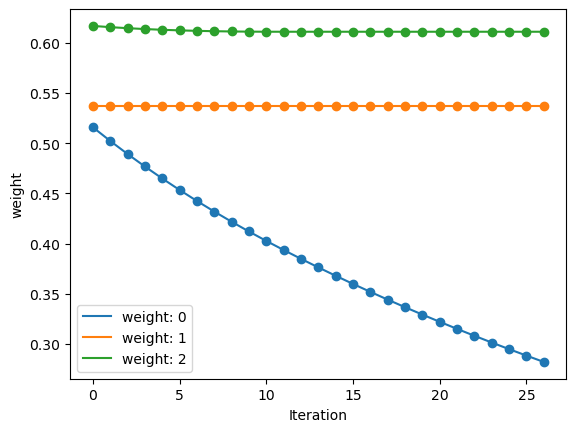

In [15]:
df_w2 = pd.DataFrame()

for iteration, values in results.items():
    weights_w2_list = [x.tolist() for x in results[iteration][3]]
    weights_w2_list = [item for sublist in weights_w2_list for item in sublist]
    df_w2 = pd.concat([df_w2, pd.DataFrame([weights_w2_list])], ignore_index=True)

fig, ax = plt.subplots()

for iteration in range(0, 3, 1):
    ax.plot(df_w2.index, df_w2[iteration], label=f'weight: {iteration}')
    ax.scatter(df_w2.index, df_w2[iteration]) 

ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('weight')

Visualize the loss value and the **predicted y value** of the **second observable**:

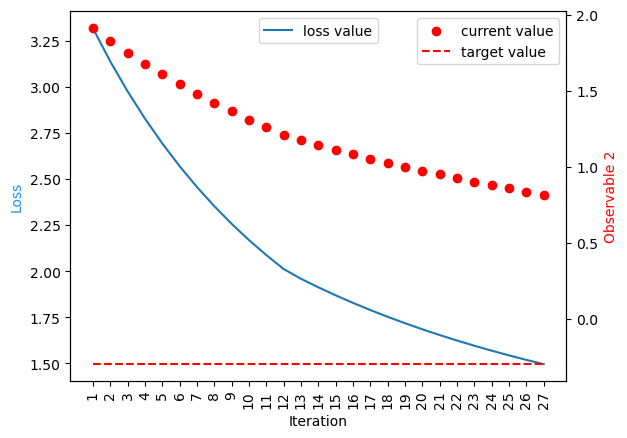

In [27]:
observable_2 = []

for values in iteration_pd['y_predicted'].values:
    observable_2.append(values[1])

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(iteration_pd.index.values, iteration_pd['loss'], label='loss value')
ax2.scatter(iteration_pd.index.values, observable_2, color='red', label='current value') 
ax2.hlines(target_Y2[1],
           min(iteration_pd.index.astype(int)-1),
           max(iteration_pd.index.astype(int)-1), colors='red',
           linestyles='dashed', label='target value')

ax1.set_xlabel('Iteration')
ax1.tick_params("x", labelrotation=90)

ax1.set_ylabel('Loss', color='DodgerBlue')
ax2.set_ylabel('Observable 2', color='red')

ax1.legend(loc='upper center')
ax2.legend(loc='upper right')

<hr style="border:2px solid gray"></hr>

### NumPy Neural Network Summary:
1. created a simple **perceptron** neural network using **NumPy only**
2. toy data creation
3. activation functions
    - adds some nonlinearity to the mathematics
    - ReLu
4. gradient optimization
5. loss function
6. detailed explanation of each mathematical step in a neural network
7. forward propagation
8. backward propagation